<a href="https://colab.research.google.com/github/merveenoyan/example_notebooks/blob/main/RT_DETR_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Try RT-DETR

In this notebook, you can try RT-DETR, Real Time Detection Transformer.

Install `transformers` from main and restart your session first.

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

You can initialize the model, image processor and infer.

In [ ]:
import torch
import requests
from PIL import Image
from transformers import RTDetrForObjectDetection, RTDetrImageProcessor

url = 'https://i.pinimg.com/originals/39/6f/b9/396fb90286728d6573405c60941043e1.jpg'
image = Image.open(requests.get(url, stream=True).raw)

image_processor = RTDetrImageProcessor.from_pretrained("PekingU/rtdetr_r50vd_coco_o365")
model = RTDetrForObjectDetection.from_pretrained("PekingU/rtdetr_r50vd_coco_o365")

inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

Post-process outputs and visualize.

In [ ]:
results = image_processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]), threshold=0.6)

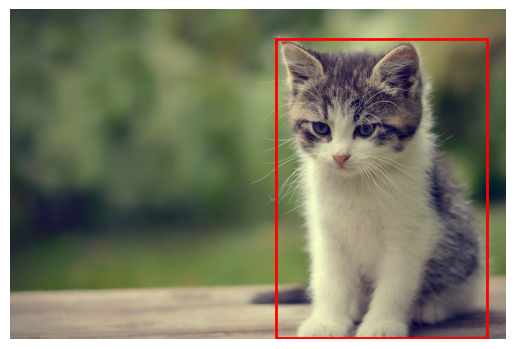

In [9]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(image)

for result in results:
    for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
        score, label = score.item(), label_id.item()
        box = [round(i, 2) for i in box.tolist()]
        rectangle = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)

ax.axis("off")
plt.show()


An easier alternative to use this model is to use [object detection pipeline](https://huggingface.co/docs/transformers/en/main_classes/pipelines#transformers.ObjectDetectionPipeline) like below.

In [11]:
from transformers import pipeline

pipe = pipeline(model="PekingU/rtdetr_r50vd_coco_o365")
pipe(url)

[{'score': 0.9354053735733032,
  'label': 'cat',
  'box': {'xmin': 1365, 'ymin': 152, 'xmax': 2445, 'ymax': 1687}}]